# 파이썬 5월 30일 강의 복습
> "7월 11일"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최석진
- categories: [Python]

## 클래스 공부 6단계

`-` 상속

### 인사관리 예제

`-` 아래와 같은 클래스를 만듬

- 이름,직급,연봉에 대한 정보가 있음.
- 연봉을 올려주는 메소드 존재.

In [4]:
class Employee:
    def __init__(self,name,position=None,pay=0):
        self.name=name
        self.position=position
        self.pay=pay
    def _repr_html_(self):
        html_str="""
        이름: {} <br/>
        직급: {} <br/>
        연봉: {} 
        """.format(self.name,self.position,self.pay)
        return html_str
    def giveraise(self,pct):
        self.pay=self.pay*(1+pct)

In [9]:
sj=Employee('sj',position='staff',pay=5000)
iu=Employee('iu',position='staff',pay=4000)
hd=Employee('hd',position='manager',pay=8000)

In [10]:
sj

In [11]:
sj.giveraise(0.1)

In [12]:
sj

회사의 모든직원 연봉을 10%씩 인상

In [13]:
sj=Employee('sj',position='staff',pay=5000)
iu=Employee('iu',position='staff',pay=4000)
hd=Employee('hd',position='manager',pay=8000)

In [14]:
for i in [sj,iu,hd]:
    i.giveraise(0.1)

In [15]:
iu

In [16]:
sj

In [17]:
hd

`-` 매니저직급은 일반직원들의 상승분에서 5%의 보너스가 추가되어 상승한다고 가정하고 모든 직원의 연봉을 10%씩 올리는 코드를 구현

(구현1)

In [19]:
sj=Employee('sj',position='staff',pay=5000)
iu=Employee('iu',position='staff',pay=4000)
hd=Employee('hd',position='manager',pay=8000)

In [21]:
for i in [sj,iu,hd]:
    if i.position=='manager':
        i.giveraise(0.1+0.05)
    else:
        i.giveraise(0.1)

In [22]:
sj

In [23]:
iu

In [24]:
hd

(구현2) 새로운 클래스를 만듬

In [25]:
class Manager:
    def __init__(self,name,position=None,pay=0):
        self.name=name
        self.position=position
        self.pay=pay
    def _repr_html_(self):
        html_str="""
        이름: {} <br/>
        직급: {} <br/>
        연봉: {}
        """.format(self.name,self.position,self.pay)
        return html_str
    def giveraise(self,pct):
        self.pay=self.pay*(1+pct+0.05)

In [26]:
sj=Employee('sj',position='staff',pay=5000)
iu=Employee('iu',position='staff',pay=4000)
hd=Manager('hd',position='manager',pay=8000)

In [27]:
for i in [sj,iu,hd]:
    i.giveraise(0.1)

In [28]:
sj

In [29]:
iu

In [30]:
hd

(구현3) 상속이용!

In [31]:
class Manager(Employee):
    def giveraise(self,pct):
        self.pay=self.pay*(1+pct+0.05)

In [32]:
sj=Employee('sj',position='staff',pay=5000)
iu=Employee('iu',position='staff',pay=4000)
hd=Manager('hd',position='manager',pay=8000)

In [33]:
for i in [sj,iu,hd]:
    i.giveraise(0.1)

In [34]:
sj

In [35]:
iu

In [36]:
hd

`-` 요약: 이미 만들어진 클래스에서 대부분의 기능은 그대로 쓰지만 일부기능만 변경 혹은 추가하고 싶다면 클래스를 상속하면 된다!

### 리스트의 상속

`-` list와 비슷한데 멤버들의 빈도가 계산되는 메소드를 포함하는 새로운 나만의 list를 만들고 싶다.

In [37]:
lst=['a','b','c','d','a','b','b']
lst

['a', 'b', 'c', 'd', 'a', 'b', 'b']

`-` 아래와 같은 딕셔너리를 마들고 싶다.

In [38]:
freq={'a':2,'b':3,'c':1,'d':1}
freq

{'a': 2, 'b': 3, 'c': 1, 'd': 1}

- `lst.frequency()`를 입력하면 위의 기능이 수행되도록 변형된 list를 쓰고 싶다.

`-` 구현

(시도1)

In [40]:
lst

['a', 'b', 'c', 'd', 'a', 'b', 'b']

In [41]:
freq={'a':0,'b':0,'c':0,'d':0}
freq

{'a': 0, 'b': 0, 'c': 0, 'd': 0}

In [42]:
for item in lst:
    freq[item]=freq[item]+1

In [43]:
freq

{'a': 2, 'b': 3, 'c': 1, 'd': 1}

(시도2)

In [44]:
lst

['a', 'b', 'c', 'd', 'a', 'b', 'b']

In [45]:
freq=dict()
freq

{}

In [46]:
for item in lst:
    freq[item]=freq[item]+1

KeyError: 'a'

에러이유? `freq['a']`를 호출할 수 없다. -> freq.get('a',0) 이용

(시도3)

In [47]:
lst

['a', 'b', 'c', 'd', 'a', 'b', 'b']

In [48]:
freq=dict()
freq

{}

In [49]:
for item in lst:
    freq[item]=freq.get(item,0)+1

In [50]:
freq

{'a': 2, 'b': 3, 'c': 1, 'd': 1}

`-` 이것을 내가 정의하는 새로운 list의 메소드로 넣고 싶다.

In [51]:
class L(list):
    def frequency(self):
        freq=dict()
        for item in self:
            freq[item]=freq.get(item,0)+1
        return freq

In [55]:
lst=L([1,1,1,2,2,3])

In [56]:
lst #원래list에 있는 repr기능을 상속받아서 이루어지는 결과

[1, 1, 1, 2, 2, 3]

In [57]:
_lst=L([4,5,6])

In [58]:
lst+_lst

[1, 1, 1, 2, 2, 3, 4, 5, 6]

In [59]:
lst+[4,5,6] #L자료형과 list자료형의 덧셈가능

[1, 1, 1, 2, 2, 3, 4, 5, 6]

- L자료형의 덧셈은 list의 덧셈과 완전히 같음

In [60]:
lst.append(10) #append함수도 그대로 사용가능
lst

[1, 1, 1, 2, 2, 3, 10]

`-` 기존리스트에서 추가로 frequency() 메소드가 존재함.

In [61]:
lst.frequency()

{1: 3, 2: 2, 3: 1, 10: 1}

## **Appendix : 사용자정의 자료형의 유용함**

`-` 사용자정의 자료형이 어떤 경우에는 유용할 수 있다.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

`-` 예제1

In [63]:
year=['2016','2017','2017','2017',2017,2018,2018,2019,2019]
value=np.random.randn(9)

In [64]:
df=pd.DataFrame({'year':year,'value':value})
df

,year,value
0,2016,-0.088765
1,2017,0.054608
2,2017,0.899841
3,2017,1.283843
4,2017,0.413797
5,2018,0.523271
6,2018,-0.745608
7,2019,0.464243
8,2019,0.271543


TypeError: 'value' must be an instance of str or bytes, not a int

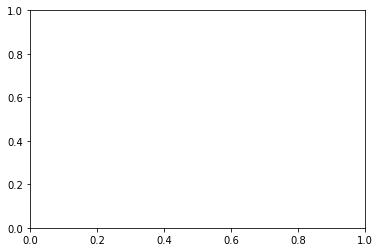

In [65]:
plt.plot(df.year,df.value)

에러의 이유 : df.year에 str,int가 동시에 존대

In [66]:
np.array(df.year)

array(['2016', '2017', '2017', '2017', 2017, 2018, 2018, 2019, 2019],
      dtype=object)

자료형을 바꿔주면 해결가능

In [68]:
np.array(df.year,dtype=np.float64)
#np.array(df.year).astype(np.float64)
#df.year.astype(np.float64)

array([2016., 2017., 2017., 2017., 2017., 2018., 2018., 2019., 2019.])

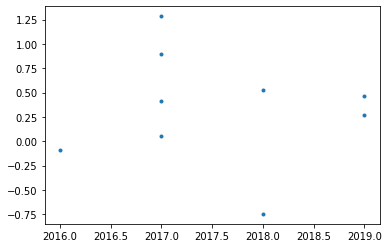

In [69]:
plt.plot(df.year.astype(np.float64),df.value,'.')

`-` 예제2

In [70]:
year = ['2016','2017','2017','2017년','2017년',2018,2018,2019,2019] 
value = np.random.randn(9)

In [71]:
df=pd.DataFrame({'year':year,'value':value})
df

,year,value
0,2016,-0.080139
1,2017,0.983098
2,2017,-0.706139
3,2017년,2.326529
4,2017년,1.785984
5,2018,1.373590
6,2018,0.301456
7,2019,0.614993
8,2019,1.229123


In [72]:
np.array(df.year,dtype=np.float64) #타입을 일괄적으로 바꾸기가 어려움.

ValueError: could not convert string to float: '2017년'

In [73]:
L(df.year).frequency()

{'2016': 1, '2017': 2, '2017년': 2, 2018: 2, 2019: 2}

- '2016'와 같은형대, '2017년'과 같은 형태, 숫자형이 혼합 -> 맞춤형 변환이 필요함

In [74]:
def f(a): ##사실 데이터의 구조를 모르면 이런 함수를 짤 수 없음 --> 자료의 구조를 확인해준다는 의미에서 freq가 있다면 편리.
    if type(a) is str:
        if "년" in a:
            return int(a.replace("년",""))
        else:
            return int(a)
    else:
        return a

In [75]:
[f(a) for a in df.year]

[2016, 2017, 2017, 2017, 2017, 2018, 2018, 2019, 2019]

In [76]:
df.year= [f(a) for a in df.year]

In [77]:
df

,year,value
0,2016,-0.080139
1,2017,0.983098
2,2017,-0.706139
3,2017,2.326529
4,2017,1.785984
5,2018,1.373590
6,2018,0.301456
7,2019,0.614993
8,2019,1.229123


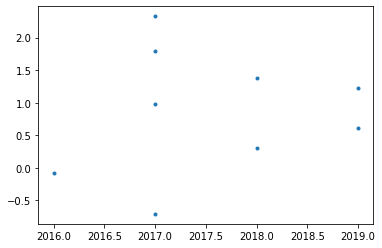

In [78]:
plt.plot(df.year,df.value,'.')